In [1]:
import numpy as np
from discreteWigner_v3 import Wigner_D_rho, Neg
import matplotlib.pyplot as plt
%matplotlib inline

# plot discrete W for given psi
def Wigner_plot(p_list, q_list, psi_list):
    rho_matrix = np.outer(psi_list, np.conj(psi_list))
    W = Wigner_D_rho(p_list, q_list, rho_matrix)               
    
    fig, ax = plt.subplots()
    im=ax.imshow(W)
    fig.colorbar(im, ax=ax)
    plt.plot()
    plt.close()
    return fig
            

In [3]:
# wave function \psi_n(x) of a harmonic oscillator
def WaveHarmOsc(x,n):
    coef=np.eye(1, n+1, n)[0]
    return (1/np.sqrt((2**n)*np.math.factorial(n)))*\
    np.exp(-x*x/2)*\
    np.polynomial.hermite.hermval(x,coef)

# coherent state
def WaveCoh(x, alpha):
    Re_alpha= alpha.real
    Im_alpha= alpha.imag    
    return ((np.pi)**(-1/4))*np.exp(-0.5*(x-np.sqrt(2)*Re_alpha)**2+1.j*x*Im_alpha*np.sqrt(2))

# squeezed state
def WaveSq(x, s):
    return ((s/np.pi)**(1/4))*np.exp(-0.5*s*x*x)


# Функция Вигнера (W) для фоковского состояния $|0\rangle$  и различных плотностях сетки

[]

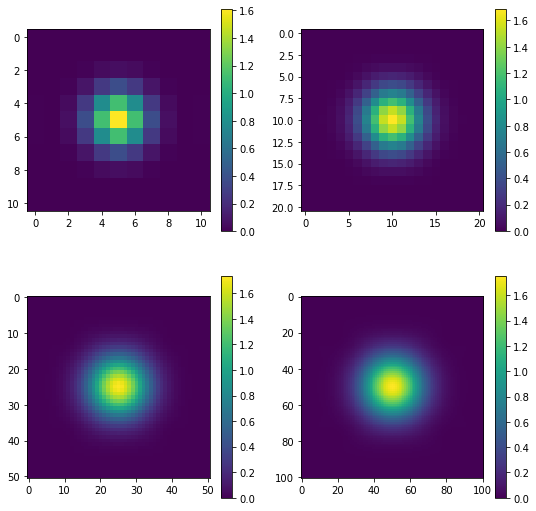

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(9,9))

x=np.linspace(-3,3,11)
psi = WaveHarmOsc(x,0)
rho = np.outer(psi, np.conj(psi))
W = Wigner_D_rho(x, x, rho)   
im=axs[0, 0].imshow(W)
fig.colorbar(im, ax=axs[0, 0])
#
x=np.linspace(-3,3,21)
psi = WaveHarmOsc(x,0)
rho = np.outer(psi, np.conj(psi))
W = Wigner_D_rho(x, x, rho)   
im=axs[0, 1].imshow(W)
fig.colorbar(im, ax=axs[0, 1])
#
x=np.linspace(-3,3,51)
psi = WaveHarmOsc(x,0)
rho = np.outer(psi, np.conj(psi))
W = Wigner_D_rho(x, x, rho)   
im=axs[1, 0].imshow(W)
fig.colorbar(im, ax=axs[1, 0])
#
x=np.linspace(-3,3,101)
psi = WaveHarmOsc(x,0)
rho = np.outer(psi, np.conj(psi))
W = Wigner_D_rho(x, x, rho)   
im=axs[1, 1].imshow(W)
fig.colorbar(im, ax=axs[1, 1])

plt.plot()




In [ ]:
# Fock state |3>
x=np.linspace(-3,3,71)
psi = WaveHarmOsc(x,0)
Wigner_plot(x, x, psi)

# coherent states with alpha = 1.j and alpha =0.5

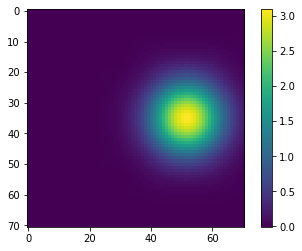

In [48]:
# coherent state with alpha = 1.j
psi = WaveCoh(x,1.j)
Wigner_plot(x, x, psi)

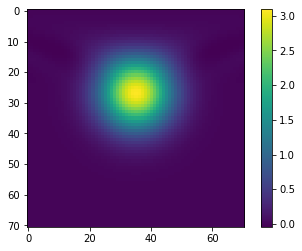

In [54]:
# coherent state with alpha = 0.5
psi = WaveCoh(x, 0.5)
Wigner_plot(x, x, psi)

# superposition of coherent states

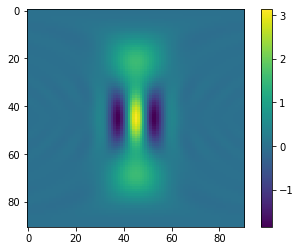

In [61]:
# superposition of coherent states
x=np.linspace(-4,4,91)
psi = (WaveCoh(x, 1.5)+WaveCoh(x, -1.5)) / np.sqrt(2)
Wigner_plot(x, x, psi)

# mixture of coherent states

[]

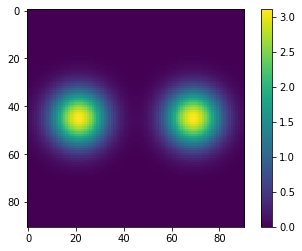

In [67]:
# mixture of coherent states

rho_matrix = np.outer(WaveCoh(x, 1.5j), np.conj(WaveCoh(x, 1.5j))) +\
np.outer(WaveCoh(x, -1.5j), np.conj(WaveCoh(x, -1.5j)))

W = Wigner_D_rho(x, x, rho_matrix)               
    
fig, ax = plt.subplots()
im=ax.imshow(W)
fig.colorbar(im, ax=ax)
plt.plot()

# squeezed state 

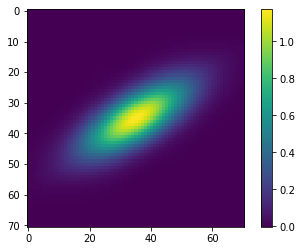

In [103]:
# squeezed state with s = 1-j 
psi = WaveSq(x, 1.-1.j)
Wigner_plot(x, x, psi)

# negativity = сумма отрицательных элементов матрицы W, деленная на количество ее элементов

# график negativity для состояния $|3\rangle$
# в зависимости от плотности сетки, т.е. от N
# сетка (q,p)=(-3,3)*(-3,3) количество точек в интервале (-3,3) равно N

In [12]:
n_list=[20, 40, 60, 80, 100, 120, 140, 160, 180] 
neg_list=[]
for n in n_list: # n is the number of points in the grid 'x'
    x=np.linspace(-3,3, n)
    psi = WaveHarmOsc(x,3)
    rho = np.outer(psi, np.conj(psi))
    W = Wigner_D_rho(x, x, rho)
    neg_list.append(Neg(W))

[]

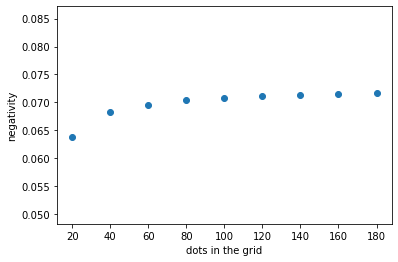

In [13]:
plt.scatter(n_list, neg_list)
plt.xlabel('dots in the grid')
plt.ylabel('negativity')
plt.plot()